Load file

In [1]:
file = ('path')

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load DataFrame

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df.shape

(240, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [7]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [8]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

The data seems clean in first sight

In [11]:
df.nunique()

Transaction ID      240
Date                240
Product Category      6
Product Name        232
Units Sold            7
Unit Price          117
Total Revenue       173
Region                3
Payment Method        3
dtype: int64

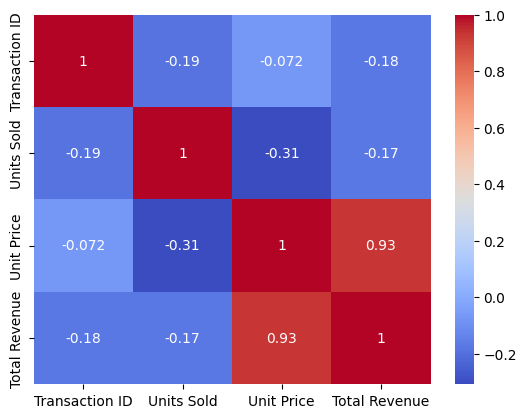

In [12]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Total Revenue and Unit Price have a high correlation, as expected

In [13]:
df['Units Sold'].unique()

array([ 2,  1,  3,  4,  5,  6, 10], dtype=int64)

Seperate the Date column to Year, Month, Day

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Drop ID column, irrelevant

In [16]:
df.drop('Transaction ID', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              240 non-null    datetime64[ns]
 1   Product Category  240 non-null    object        
 2   Product Name      240 non-null    object        
 3   Units Sold        240 non-null    int64         
 4   Unit Price        240 non-null    float64       
 5   Total Revenue     240 non-null    float64       
 6   Region            240 non-null    object        
 7   Payment Method    240 non-null    object        
 8   Year              240 non-null    int32         
 9   Month             240 non-null    int32         
 10  Day               240 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 17.9+ KB


In [18]:
# re-arranging the columns
df = df[['Product Category', 'Product Name', 'Units Sold', 'Unit Price', 'Total Revenue', 
         'Region', 'Payment Method', 'Year', 'Month', 'Day', 'Date']]
df.head()

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Date
0,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1,1,2024-01-01
1,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,1,2,2024-01-02
2,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1,3,2024-01-03
3,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,1,4,2024-01-04
4,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,1,5,2024-01-05


In [19]:
df.max(axis=0)

Product Category                  Sports
Product Name        iRobot Braava Jet M6
Units Sold                            10
Unit Price                       3899.99
Total Revenue                    3899.99
Region                     North America
Payment Method                    PayPal
Year                                2024
Month                                  8
Day                                   31
Date                 2024-08-27 00:00:00
dtype: object

Calculating Manually the Total Revenue and Comparing with the Original, to find any mis-matches

In [20]:
df['Calculated Revenue'] = df['Units Sold'] * df['Unit Price']
df['Revenue Match'] = df['Calculated Revenue'] == df['Total Revenue']
print(df['Revenue Match'].value_counts())

Revenue Match
True     231
False      9
Name: count, dtype: int64


9 Rows do not match, but the values are exactly the same

In [21]:
df[df['Revenue Match'] == False]

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Date,Calculated Revenue,Revenue Match
2,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1,3,2024-01-03,209.97,False
8,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card,2024,1,9,2024-01-09,539.94,False
31,Home Appliances,Instant Pot Duo,3,89.99,269.97,Europe,PayPal,2024,2,1,2024-02-01,269.97,False
53,Sports,Titleist Pro V1 Golf Balls,5,49.99,249.95,Asia,Credit Card,2024,2,23,2024-02-23,249.95,False
74,Clothing,Tommy Hilfiger Polo Shirt,5,49.99,249.95,Asia,Debit Card,2024,3,15,2024-03-15,249.95,False
77,Sports,Rogue Fitness Kettlebell,3,69.99,209.97,Asia,Credit Card,2024,3,18,2024-03-18,209.97,False
86,Clothing,Uniqlo Ultra Light Down Jacket,3,79.99,239.97,Asia,Debit Card,2024,3,27,2024-03-27,239.97,False
113,Sports,Fitbit Versa 3,3,229.95,689.85,Asia,Credit Card,2024,4,23,2024-04-23,689.85,False
233,Sports,Hydro Flask Standard Mouth Water Bottle,3,32.95,98.85,Asia,Credit Card,2024,8,21,2024-08-21,98.85,False


Dtype is also the same, the float value must be the issue

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product Category    240 non-null    object        
 1   Product Name        240 non-null    object        
 2   Units Sold          240 non-null    int64         
 3   Unit Price          240 non-null    float64       
 4   Total Revenue       240 non-null    float64       
 5   Region              240 non-null    object        
 6   Payment Method      240 non-null    object        
 7   Year                240 non-null    int32         
 8   Month               240 non-null    int32         
 9   Day                 240 non-null    int32         
 10  Date                240 non-null    datetime64[ns]
 11  Calculated Revenue  240 non-null    float64       
 12  Revenue Match       240 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int32(3

Use a small tolerance value and compare the columns

In [23]:
# Define a tolerance value
tolerance = 1e-6

# Calculate the revenue manually
df['Calculated Revenue'] = df['Units Sold'] * df['Unit Price']

# Compare the manually calculated revenue with the total revenue using a tolerance
df['Revenue Match'] = np.isclose(df['Calculated Revenue'], df['Total Revenue'], atol=tolerance)

# Print the count of matches and mismatches
match_counts = df['Revenue Match'].value_counts()
print(match_counts)

Revenue Match
True    240
Name: count, dtype: int64


Values are the same, so the float values have a tiny difference

In [24]:
# If all values match, decide to keep or replace total revenue
if match_counts[True] == len(df):
    print("All values match within the tolerance.")
    # Optionally replace total revenue
    # df['Total Revenue'] = df['Calculated Revenue']
    # Clean up temporary columns
    df.drop(columns=['Calculated Revenue', 'Revenue Match'], inplace=True)
    print("Keeping Original Column")
else:
    print("There are mismatches even within the tolerance.")
    # Investigate mismatched rows
    mismatched_rows = df[df['Revenue Match'] == False]
    print(mismatched_rows)

All values match within the tolerance.
Keeping Original Column


Viewing the highest price products

In [25]:
df['Unit Price'].max()

3899.99

In [26]:
df.nlargest(5, 'Unit Price')

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Date
102,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card,2024,4,12,2024-04-12
6,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card,2024,1,7,2024-01-07
216,Electronics,Apple MacBook Pro 16-inch,1,2399.00,2399.00,North America,Credit Card,2024,8,4,2024-08-04
35,Sports,Peloton Bike,1,1895.00,1895.00,Asia,Credit Card,2024,2,5,2024-02-05
72,Electronics,HP Spectre x360 Laptop,1,1599.99,1599.99,North America,Credit Card,2024,3,13,2024-03-13


In [27]:
df.nsmallest(5,  'Unit Price')

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Date
106,Beauty Products,The Ordinary Niacinamide Serum,1,6.50,6.50,Europe,PayPal,2024,4,16,2024-04-16
226,Beauty Products,The Ordinary Caffeine Solution 5% + EGCG,1,6.70,6.70,Europe,PayPal,2024,8,14,2024-08-14
136,Beauty Products,The Ordinary Hyaluronic Acid Serum,1,6.80,6.80,Europe,PayPal,2024,5,16,2024-05-16
159,Books,The Art of War by Sun Tzu,3,7.99,23.97,North America,Credit Card,2024,6,8,2024-06-08
129,Books,The Four Agreements by Don Miguel Ruiz,2,8.99,17.98,North America,Credit Card,2024,5,9,2024-05-09


In [28]:
df[['Unit Price']].idxmax()

Unit Price    102
dtype: int64

In [29]:
df.loc[df['Unit Price'] > 1500]

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Date
6,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card,2024,1,7,2024-01-07
35,Sports,Peloton Bike,1,1895.00,1895.00,Asia,Credit Card,2024,2,5,2024-02-05
72,Electronics,HP Spectre x360 Laptop,1,1599.99,1599.99,North America,Credit Card,2024,3,13,2024-03-13
102,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card,2024,4,12,2024-04-12
216,Electronics,Apple MacBook Pro 16-inch,1,2399.00,2399.00,North America,Credit Card,2024,8,4,2024-08-04


Visualizations

Distribution of Categorical Cols With Pie Charts

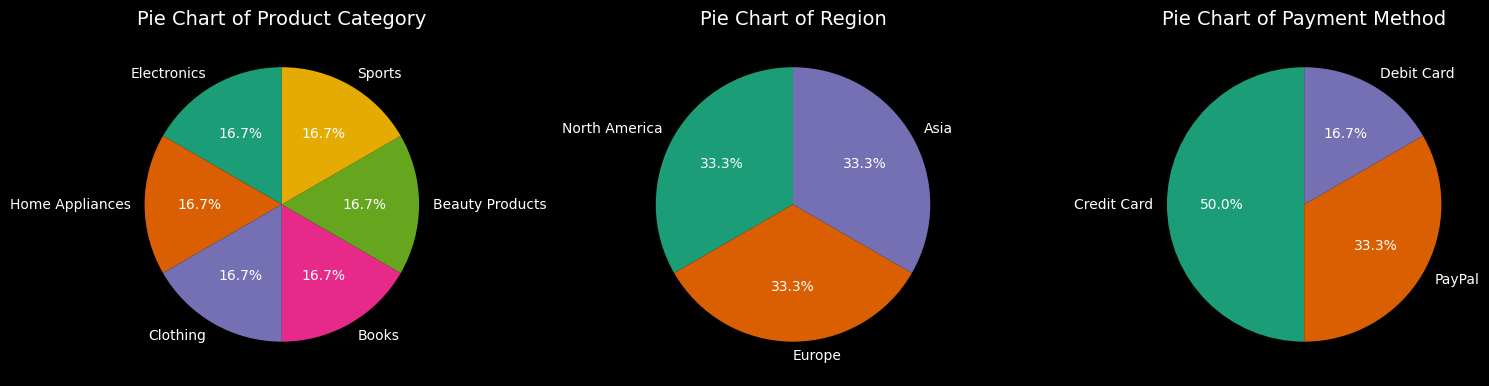

In [30]:
cat_columns = ['Product Category', 'Region', 'Payment Method']

fig, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(15,5), 
                         facecolor='black')

for i, col in enumerate(cat_columns):
    counts = df[col].value_counts()
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                      startangle=90, colors=plt.cm.Dark2.colors)
    
    for text, autotext in zip(texts, autotexts):
        text.set_color('white')
        autotext.set_color('white')
        
    ax.set_title(f'Pie Chart of {col}', color='white', fontsize=14)
    ax.set_facecolor('black')
    
plt.tight_layout()
plt.show()

Distrbution of Numerical Cols

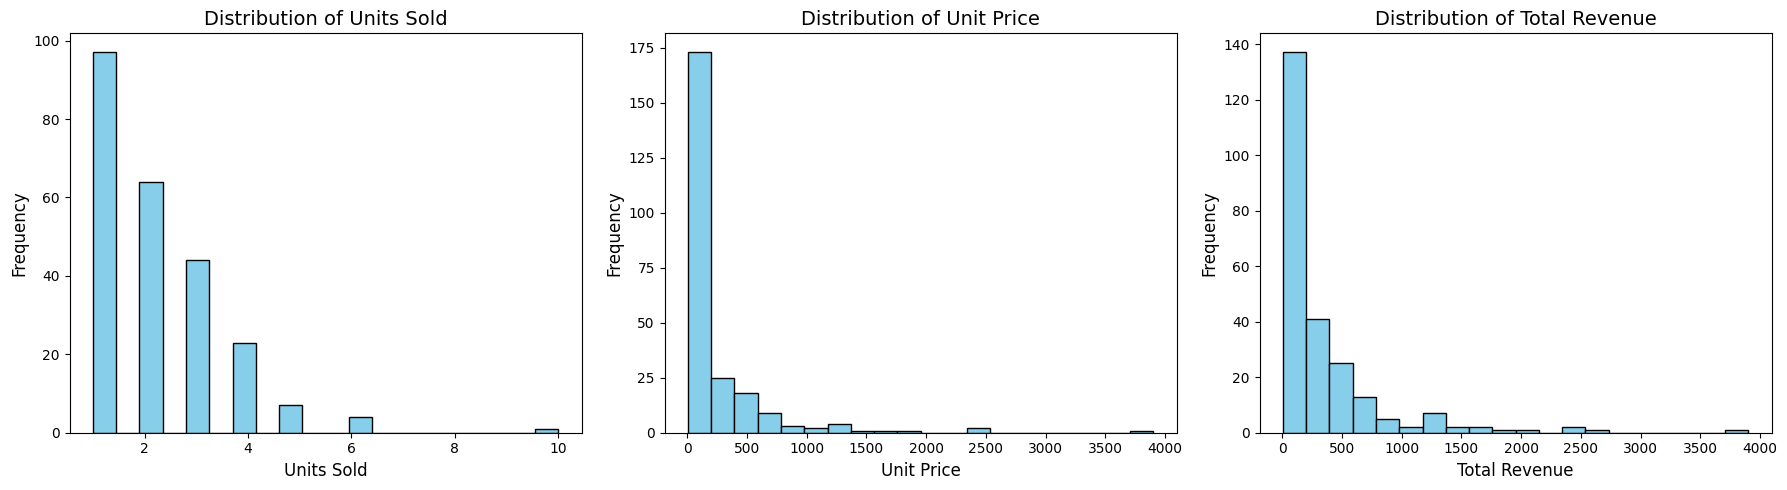

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

columns_to_plot = ['Units Sold', 'Unit Price', 'Total Revenue']
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

Overall Sales Trend over time

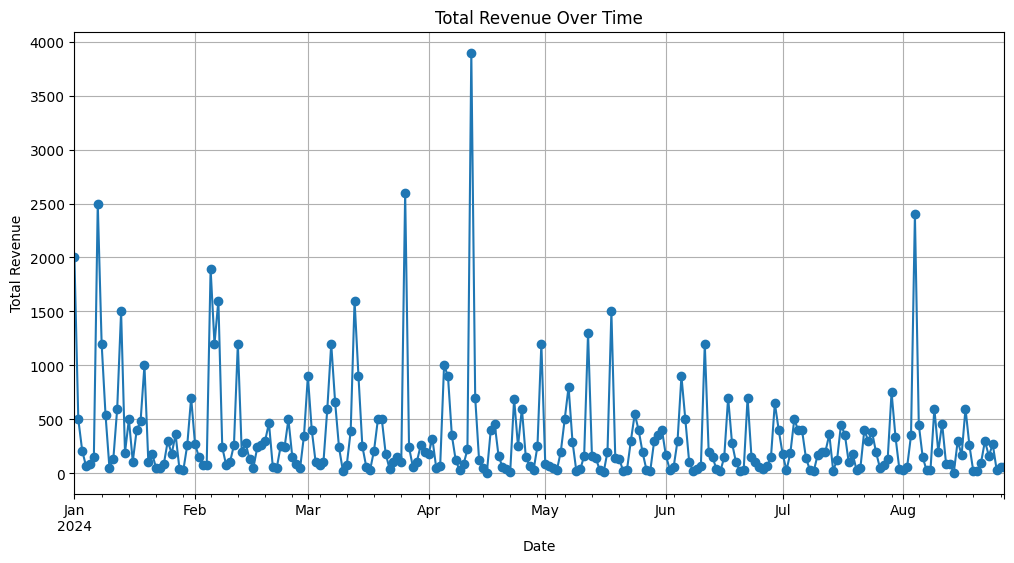

In [32]:
plt.figure(figsize=(12,6))
df.groupby('Date')['Total Revenue'].sum().plot(marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

Grouping by columns and after visualizing

In [33]:
# monthly trends
monthly_trends = df.groupby('Month')['Total Revenue'].sum()
monthly_trends.info()


<class 'pandas.core.series.Series'>
Index: 8 entries, 1 to 8
Series name: Total Revenue
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 96.0 bytes


Need to convert from Series to DataFrame

In [34]:
monthly_trends = monthly_trends.to_frame()
monthly_trends

,Total Revenue
Month,
1,14548.32
2,10803.37
3,12849.24
4,12451.69
5,8455.49
6,7384.55
7,6797.08
8,7278.11


In [35]:
monthly_trends.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1 to 8
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total Revenue  8 non-null      float64
dtypes: float64(1)
memory usage: 96.0 bytes


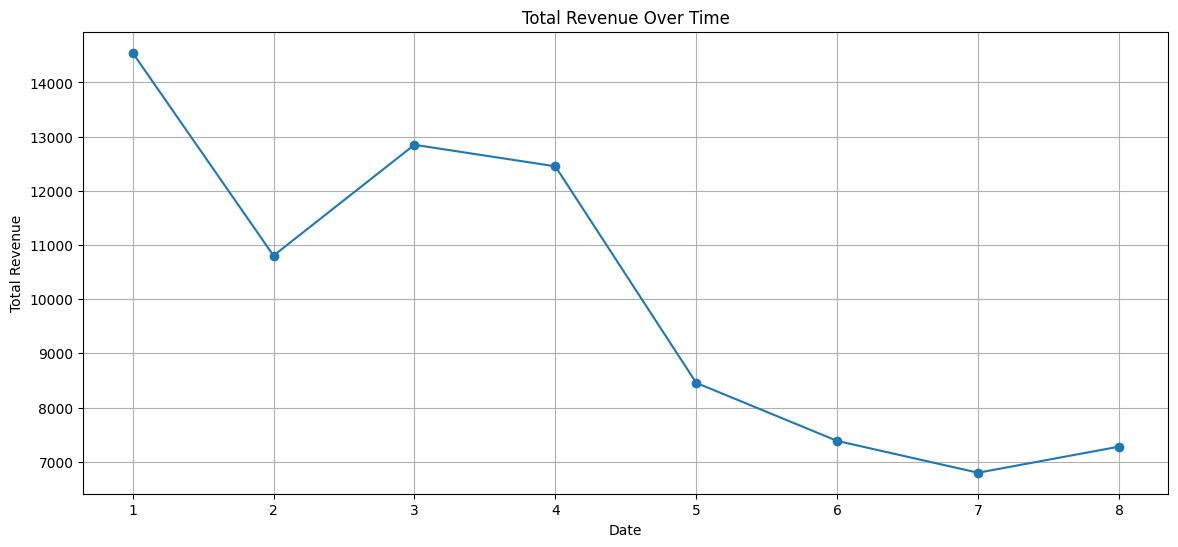

In [36]:
plt.figure(figsize=(14,6))
df.groupby('Month')['Total Revenue'].sum().plot(marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [37]:
# Product Category Analysis
category_analysis = df.groupby('Product Category')['Total Revenue'].sum()
category_analysis = category_analysis.to_frame()

In [38]:
category_analysis

,Total Revenue
Product Category,
Beauty Products,2621.90
Books,1861.93
Clothing,8128.93
Electronics,34982.41
Home Appliances,18646.16
Sports,14326.52


C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\3342511515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=category_analysis, x='Product Category', y='Total Revenue', palette='viridis')


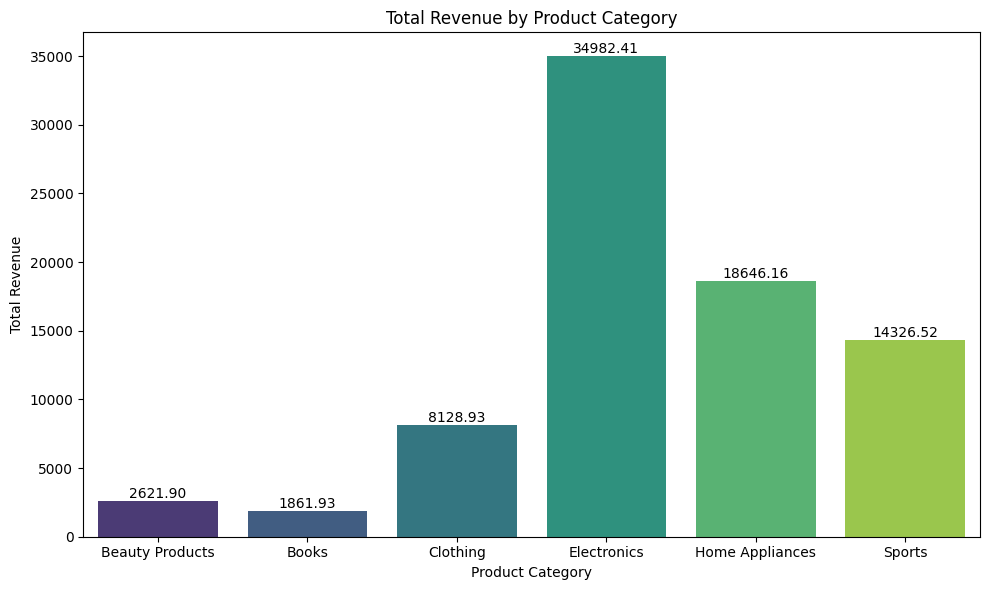

In [39]:
# Product Category Analysis
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=category_analysis, x='Product Category', y='Total Revenue', palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va='center',
    xytext = (0,5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [40]:
# Regional Performance
regional_performance = df.groupby('Region')['Total Revenue'].sum()
regional_performance = regional_performance.to_frame()

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\3235105500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=regional_performance, x='Region', y='Total Revenue', palette='plasma')


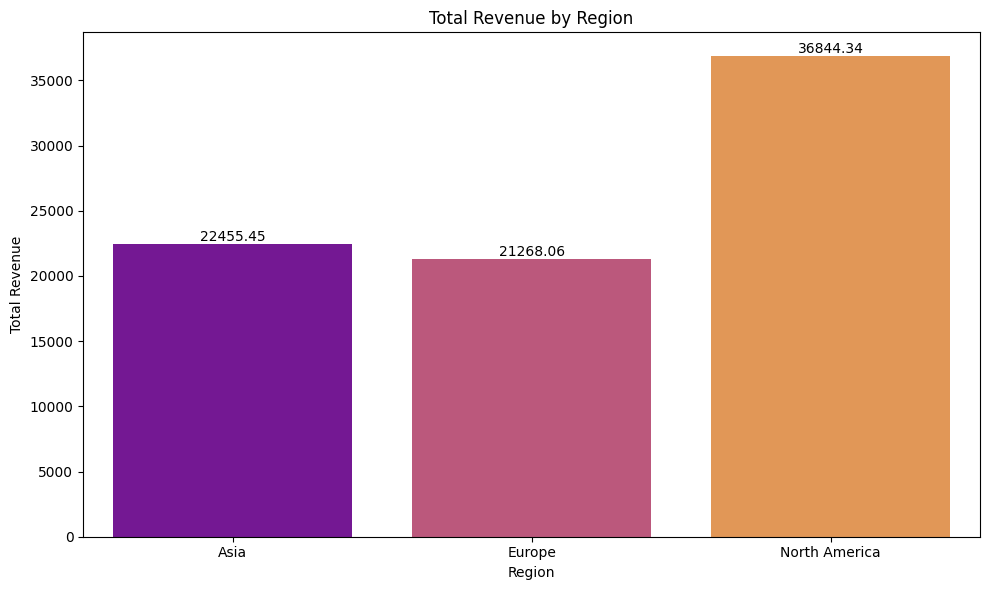

In [41]:
# Regional Performance
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=regional_performance, x='Region', y='Total Revenue', palette='plasma')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')

# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va='center',
    xytext = (0,5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [42]:
# Payment Method Comparison
payment_method_comparison = df.groupby('Payment Method')['Total Revenue'].sum()
payment_method_comparison = payment_method_comparison.to_frame()

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\2898048625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=payment_method_comparison, x='Payment Method', y='Total Revenue',


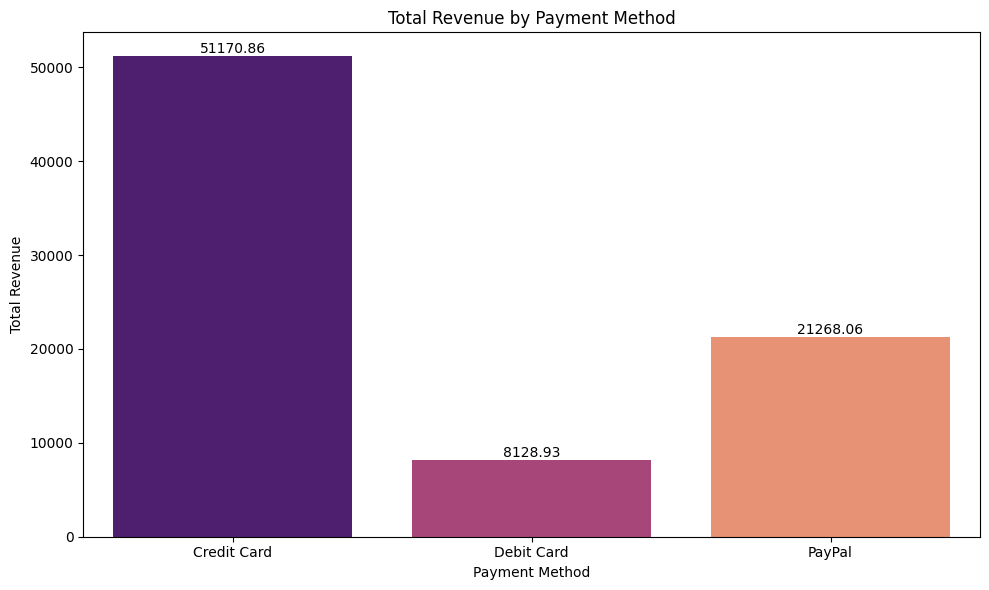

In [43]:
# Payment Method Comparison
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(data=payment_method_comparison, x='Payment Method', y='Total Revenue', 
            palette='magma')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')

# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va='center',
    xytext = (0,5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [44]:
payment_region_sales = df.groupby(['Region', 'Payment Method'])['Total Revenue'].sum().unstack()
payment_region_sales

Payment Method,Credit Card,Debit Card,PayPal
Region,,,
Asia,14326.52,8128.93,NaN
Europe,NaN,NaN,21268.06
North America,36844.34,NaN,NaN


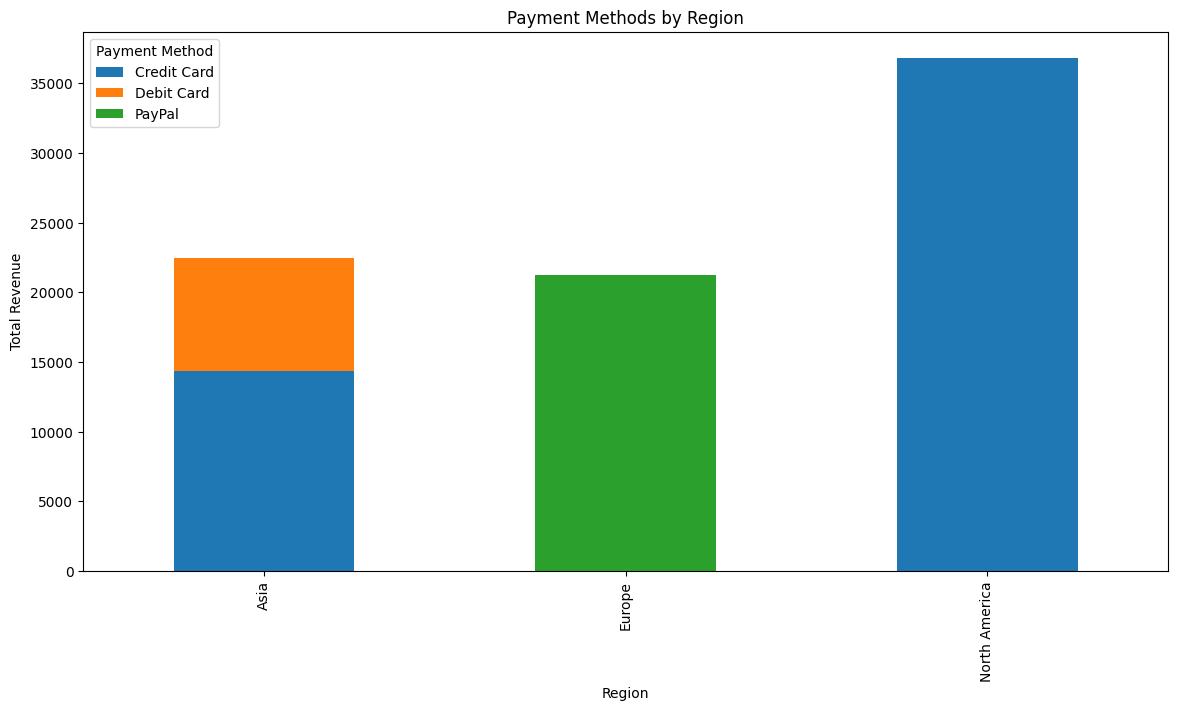

In [45]:
payment_region_sales.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Payment Methods by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Method')
plt.show()

In [46]:
# top selling products within each category
top_products = df.groupby(['Product Category', 'Product Name'])['Total Revenue'].sum().reset_index()
top_products = top_products.sort_values(by='Total Revenue', ascending=False).groupby('Product Category').head(5)

In [47]:
top_products

,Product Category,Product Name,Total Revenue
130,Electronics,Canon EOS R5 Camera,3899.99
182,Home Appliances,LG OLED TV,2599.98
142,Electronics,MacBook Pro 16-inch,2499.99
123,Electronics,Apple MacBook Pro 16-inch,2399.00
154,Electronics,iPhone 14 Pro,1999.98
217,Sports,Peloton Bike,1895.00
138,Electronics,HP Spectre x360 Laptop,1599.99
190,Home Appliances,Roomba i7+,1599.98
157,Home Appliances,Blueair Classic 480i,1199.98
205,Sports,Garmin Fenix 6X Pro,999.99


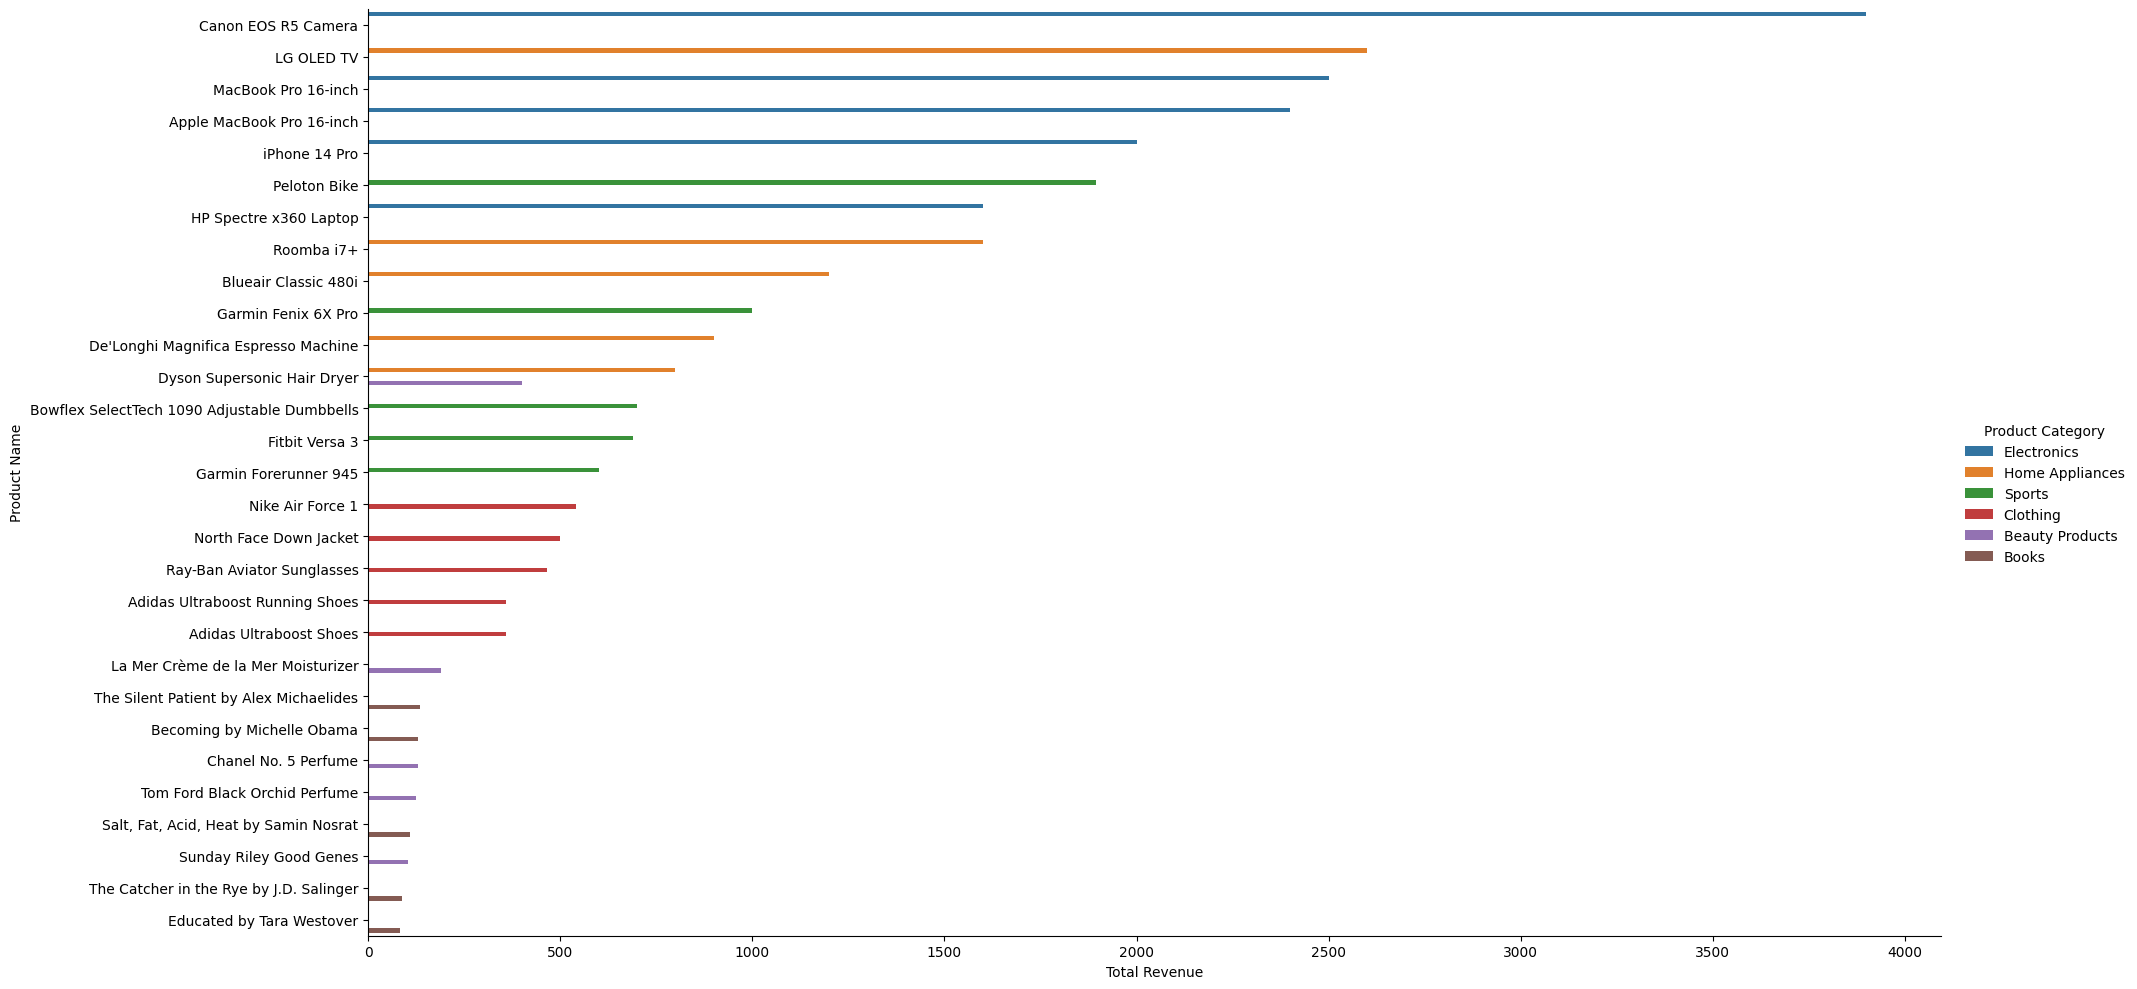

In [48]:
# Plot the top-selling products
g = sns.catplot(x='Total Revenue', y='Product Name', hue='Product Category', data=top_products, kind='bar', height=10, aspect=2)
g.set_titles('Top-Selling Products Within Each Category')
g.set_axis_labels('Total Revenue', 'Product Name')
plt.show()

In [49]:
df.loc[df['Product Name'] == 'Canon EOS R5 Camera']

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Date
102,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card,2024,4,12,2024-04-12


In [50]:
# Aggregate the data to get the total revenue for each product
top_selling = df.groupby(['Product Category', 'Product Name'])['Total Revenue'].sum().reset_index()

# Filter the products where Total Revenue is greater than 2000
top_selling_filtered = top_selling[top_selling['Total Revenue'] > 2000]
top_selling_filtered.sort_values(by='Total Revenue', ascending=False)

,Product Category,Product Name,Total Revenue
130,Electronics,Canon EOS R5 Camera,3899.99
182,Home Appliances,LG OLED TV,2599.98
142,Electronics,MacBook Pro 16-inch,2499.99
123,Electronics,Apple MacBook Pro 16-inch,2399.00


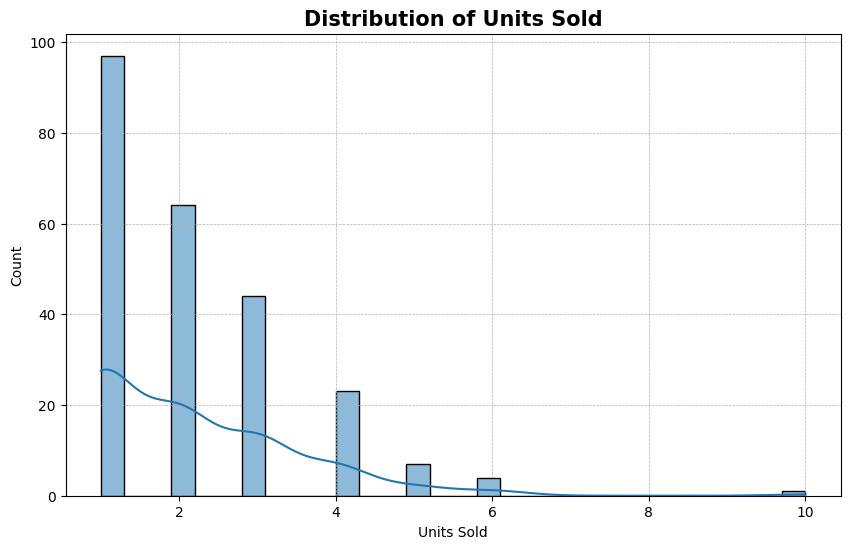

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.title('Distribution of Units Sold', fontsize=15, fontweight='bold')
plt.xlabel = ('Units Sold')
plt.ylabel = ('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

TypeError: 'str' object is not callable

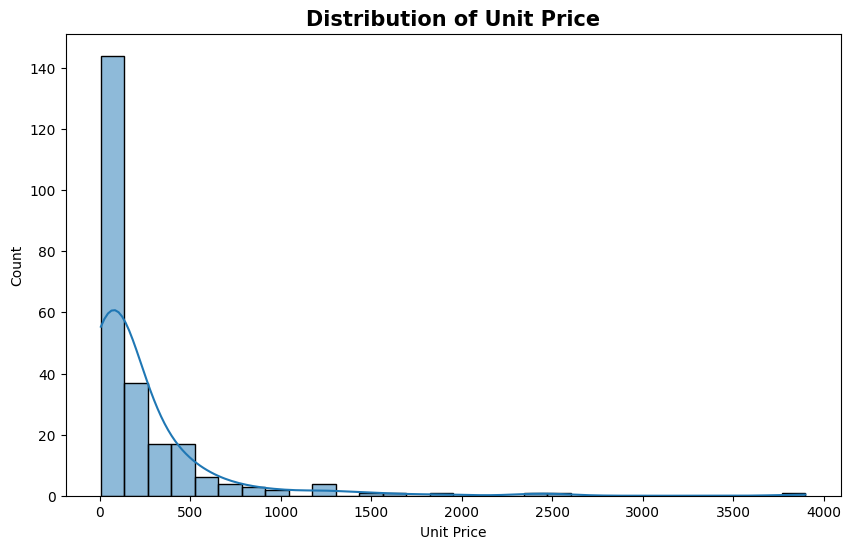

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit Price'], bins=30, kde=True)
plt.title('Distribution of Unit Price', fontsize=15, fontweight='bold')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

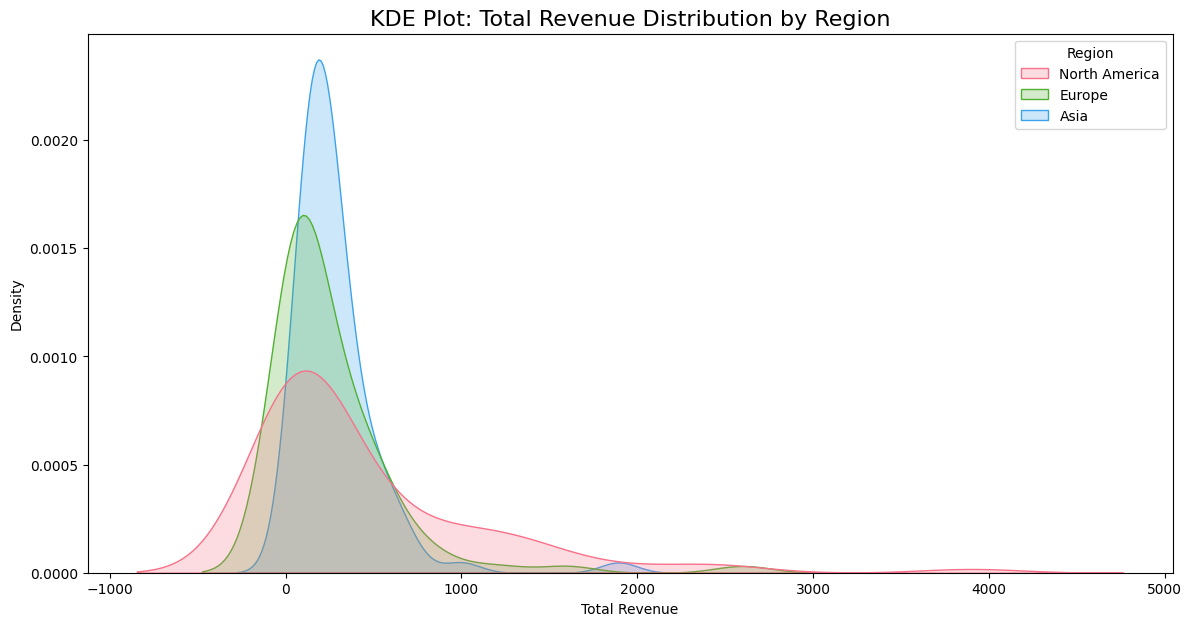

In [ ]:
# Plotting kde plot for comparing total revenue distribution between regions

plt.figure(figsize=(14,7))
sns.kdeplot(data=df, x='Total Revenue', hue='Region', fill=True, common_norm=False,
            palette='husl')
plt.title('KDE Plot: Total Revenue Distribution by Region', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Density')
plt.show()

In [67]:
# TypeError: 'str' object is not callable

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Model Building

In [53]:
# Total Revenue Prediction

X = df.drop(['Total Revenue', 'Date', 'Year'], axis=1)
y = df['Total Revenue']

Convert Categorical to Numerical Data

In [54]:
X = pd.get_dummies(X, dtype=int)
X

,Units Sold,Unit Price,Month,Day,Product Category_Beauty Products,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,...,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Asia,Region_Europe,Region_North America,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal
0,2,999.99,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,499.99,1,2,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,3,69.99,1,3,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.99,1,4,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,89.99,1,5,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,159.99,8,23,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
236,3,90.00,8,24,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
237,3,10.99,8,25,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
238,1,55.00,8,26,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Split Data, to train and test set

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)

(192, 248)
(48, 248)


Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [59]:
model1 = linear_reg.fit(X_train, y_train)

In [60]:
# Theta zero
print(model1.intercept_)
print('\n')
# Theta one
print(model1.coef_)

1452.788664830824


[ 2.90029234e+01 -5.42112299e+00  4.74376114e-01  6.07397504e-01
 -1.00683724e+03 -2.09438565e+03 -3.48824494e+02  2.43228118e+03
  9.45878363e+02  7.18878476e+01 -3.65363012e+01 -3.21430592e+02
 -2.00865307e+02 -1.50703445e+03  1.56268606e+02 -1.81495352e-09
  7.88302251e+02  7.82644943e+02 -4.28766749e+03 -4.04798417e-12
 -4.31560198e+03 -2.29309562e+02 -4.19911356e+03 -8.64916657e+02
  1.52637972e+03 -1.15350457e+03 -2.84851174e+03  3.03400408e+03
  1.07362978e+04 -3.37601997e+03 -1.35598567e+03 -2.58274437e+02
 -8.03259625e+01 -6.81547684e+01  1.13686838e-13 -1.13686838e-13
  2.11251091e+03 -1.42108547e-13 -2.75899365e+03 -8.78529060e+02
  0.00000000e+00 -6.22421257e+02  2.79198672e+03  8.69635561e+02
  8.97997608e+02 -1.03245805e+03 -1.25871715e+02 -3.91968809e+02
 -3.27429255e+02  2.03713775e+04  1.33091205e+02  1.34511766e+02
 -2.89701509e+02 -1.51679255e+02  0.00000000e+00  2.73682443e+02
 -1.79348082e+02 -2.98053017e+01  5.68434189e-14 -2.27373675e-13
 -8.6

In [61]:
y_pred1 = model1.predict(X_test)
y_pred1

array([ 3.05112830e+03, -8.88627545e+03,  1.15547745e+02,  1.45186478e+03,
        3.58822161e+02,  2.08715061e+02,  1.58245636e+03,  1.49399032e+02,
       -7.55451783e+01,  7.65854992e+01,  5.59668226e+01,  2.34443932e+01,
        3.32300018e+03,  8.80191799e+02,  5.13812424e+02,  2.56624104e+02,
       -1.01801406e+03,  8.17720138e+00,  2.70557900e+02,  6.07764644e+02,
        1.72983792e+02,  1.77631643e+03,  1.45619188e+03,  2.81271945e+03,
        5.31471185e+02,  2.78500664e+03, -3.44499444e+02,  9.82937076e+01,
        1.52492487e+02,  7.60439304e+01,  3.09901672e+03,  3.75909525e+03,
        1.34627098e+03,  2.43926661e+02,  1.99226224e+03,  1.12006720e+02,
        3.58758329e+03, -3.88621405e+02, -3.91184016e+02,  2.08117697e+03,
        9.15537665e+02,  2.86979990e+02, -1.55683184e+03, -1.80455827e+03,
       -2.11321570e+02, -1.83786680e+03,  1.84707531e+02,  2.74809487e+02])

In [62]:
linear_reg.score(X_train,y_train)

1.0

In [63]:
# Residual Analysis
resid1 = y_test - y_pred1
resid1

24     -2751.138296
6      11386.265447
93       -70.577745
109    -1291.874781
104     -238.852161
172     -179.215061
233    -1483.606364
86        90.570968
9        127.525178
143      223.404501
45        74.033177
206      172.555607
114    -3073.010177
168     -180.201799
113      176.037576
230        3.335896
185     1517.964055
15        99.792799
152     -105.587900
125     -407.774644
127      626.996208
19     -1676.326430
235    -1296.201875
30     -2112.739455
176     -471.871185
150    -2435.016638
10       474.489444
201      -68.313708
237     -119.522487
153      -42.063930
96     -2199.046719
228    -3590.095252
25     -1166.280975
182      -63.956661
18      -992.282235
69       -90.026720
192    -3387.593287
55       888.611405
79       891.174016
175    -1981.196973
227     -615.637665
112     -271.979990
221     2156.821836
16      2204.548268
156     1111.311570
66      3037.856802
165     -148.747531
38       -34.849487
Name: Total Revenue, dtype: float64

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\2536422909.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid1, bins=10)


TypeError: 'str' object is not callable

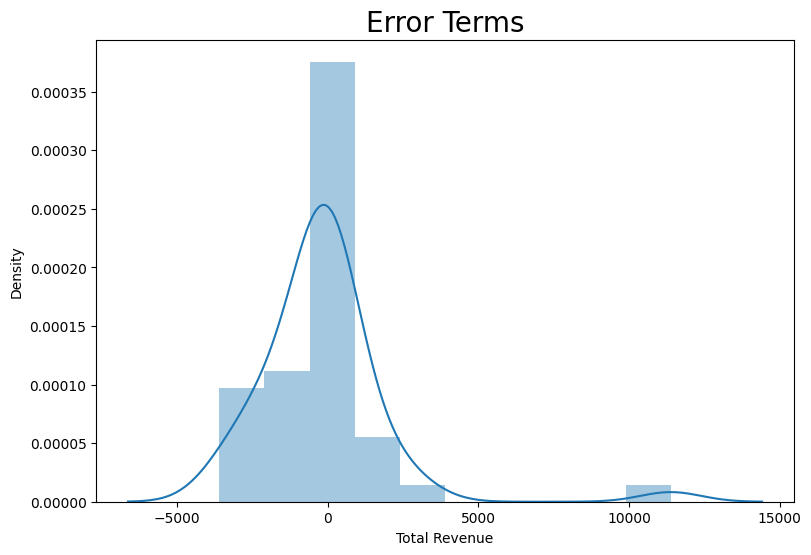

In [64]:
# Error plot

plt.figure(figsize=(9,6))

sns.distplot(resid1, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

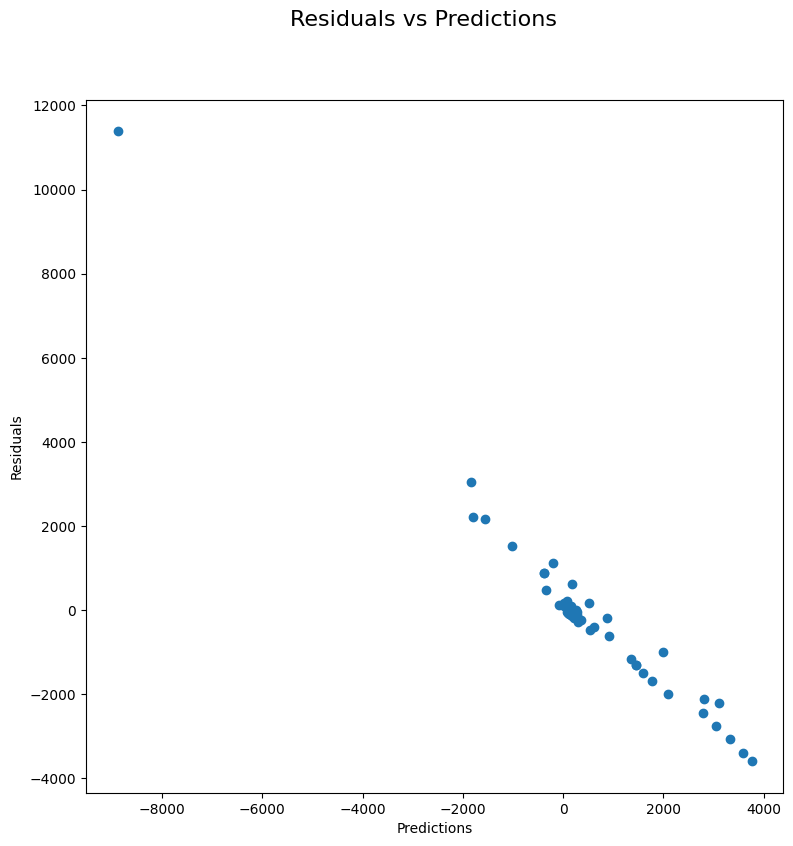

In [76]:
# Residuals vs Predictions plot

plt.figure(figsize=(9,9))

plt.scatter(y_pred1, resid1)
plt.hlines(0,-0.5, 1.5)
plt.suptitle('Residuals vs Predictions', fontsize=16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

plt.show()

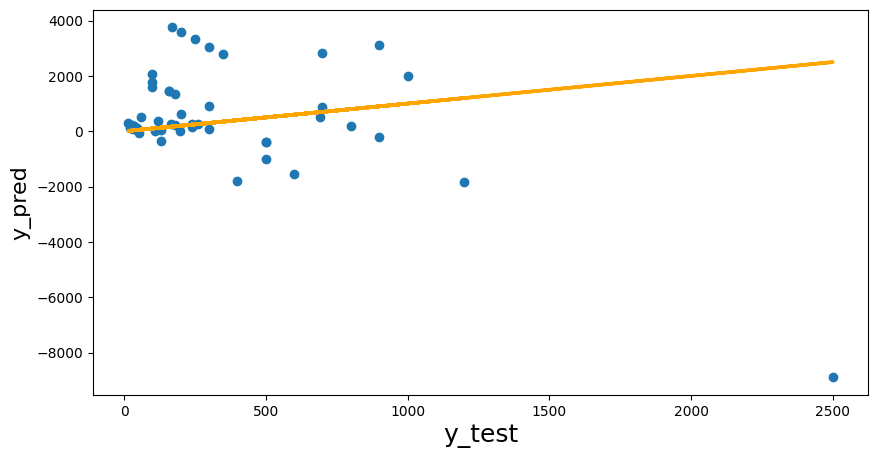

In [68]:
# Evaluation

plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred1)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

Metrics

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:",r2_score(y_test, y_pred1))
print('MAE:', mean_absolute_error(y_test, y_pred1))
print('MSE:', mean_squared_error(y_test, y_pred1))

R2 Score: -24.833182673345522
MAE: 1204.351726743166
MSE: 4719814.745269977


Support Vector Regressor

In [71]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [95]:
parameters={"kernel":["linear","poly", "rbf", "sigmoid"],
            "C" : [1,3,5,7,],
           "epsilon":[0.01,0.1,0.3,0.5]}

In [96]:
tuning_model = SVR()

In [97]:
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 3, 5, 7], 'epsilon': [0.01, 0.1, 0.3, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [98]:
# best hyperparameters
print(grids.best_estimator_)
# best model score
print(grids.best_score_)

SVR(C=7, epsilon=0.5, kernel='linear')
0.8474309943368528


In [72]:
model2 = SVR(C=7, epsilon=0.5, kernel='linear')
model2.fit(X_train, y_train)

SVR(C=7, epsilon=0.5, kernel='linear')

In [73]:
y_pred2 = model2.predict(X_test)
y_pred2

array([ 332.72364168, 2513.5776231 ,   58.9085716 ,  174.46697893,
        147.27778119,   25.78790341,  106.87067222,  189.08048632,
         49.41524127,  309.14673689,  116.30267306,  161.12664337,
        275.17262938,  716.02688285,  312.73552435,  196.32800067,
        502.69550226,   87.2442608 ,  157.29780747,  210.7652476 ,
        445.25452512,  123.0110774 ,  163.58503136,  417.19153895,
        151.77333724,  371.3505299 ,  139.17191547,   15.03258296,
         43.34703117,   20.41095743,  395.75266856,  184.50900081,
        202.05026455,  159.57194169,  566.31446725,   22.18921112,
        218.09875382,  516.52032245,  514.03840393,   95.0576756 ,
        187.89508956,   16.74049982,  598.95280304,  406.49577192,
        914.69840832, 1219.95264516,   82.32178206,  207.85510787])

In [74]:
resid2 = y_test - y_pred2

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\404031459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid2, bins=10)


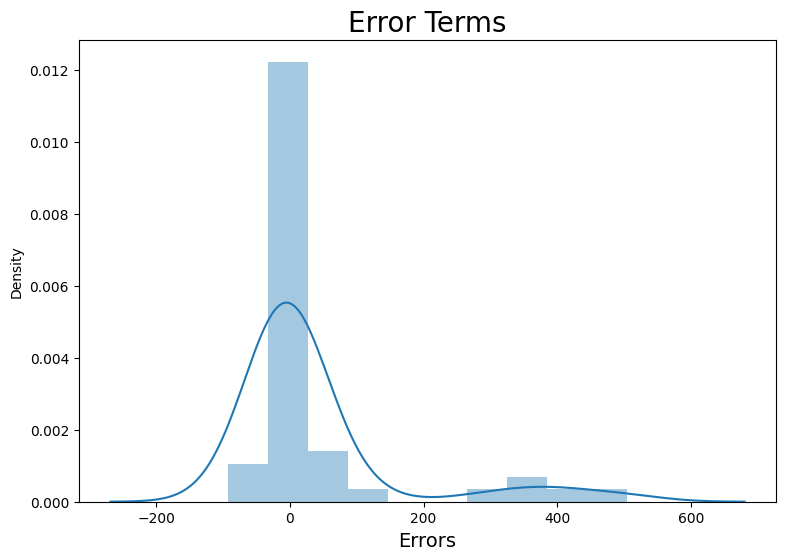

In [75]:
plt.figure(figsize=(9,6))

sns.distplot(resid2, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

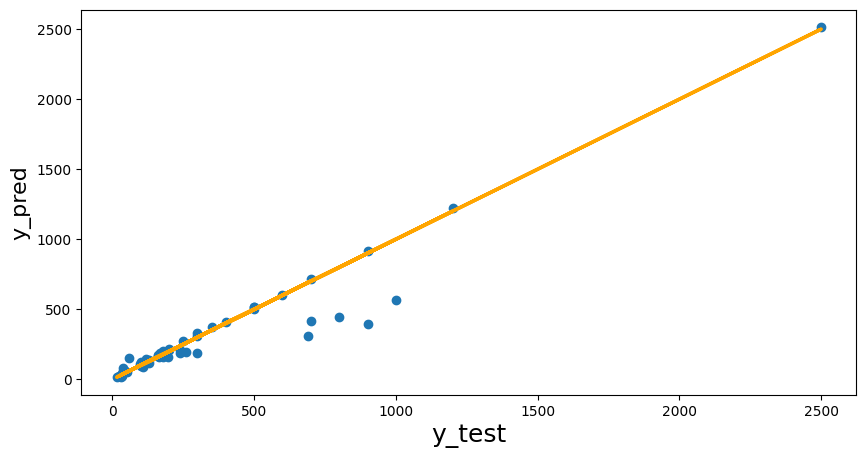

In [77]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred2)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [78]:
print("R2 Score:",r2_score(y_test, y_pred2))
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))

R2 Score: 0.905256013165916
MAE: 59.555799072121225
MSE: 17310.06480074811


Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
parameters={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "max_depth":[1,2,3,4,5,7,9],
            "min_samples_split":[1,2,3,4,5]}

In [108]:
tuning_model = DecisionTreeRegressor()
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [109]:
# best hyperparameters
print(grids.best_estimator_)
# best model score
print(grids.best_score_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_split=3)
0.7784748755677665


In [80]:
model3 = DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_split=3)

model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

In [81]:
resid3 = y_test - y_pred3

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\1934661290.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid3, bins=10)


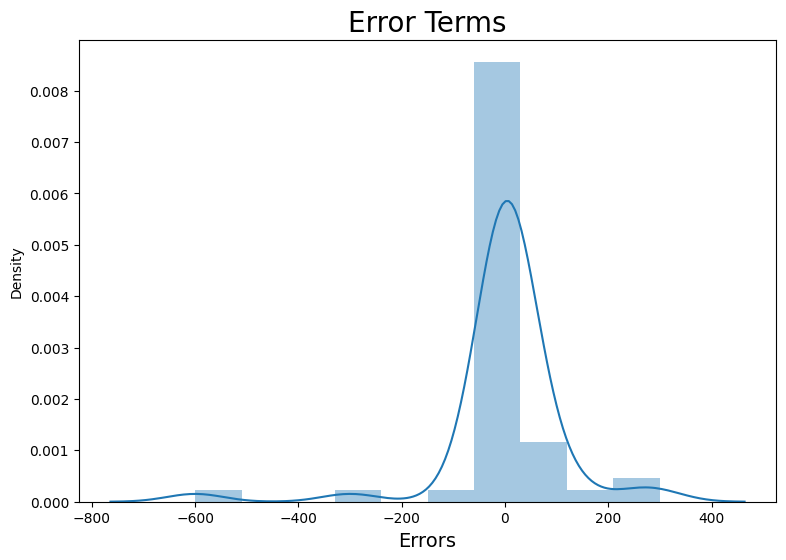

In [82]:
plt.figure(figsize=(9,6))

sns.distplot(resid3, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

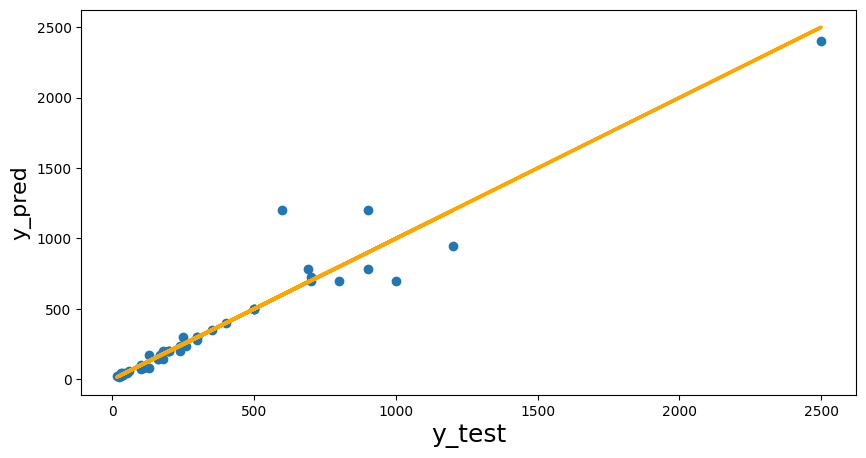

In [83]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred3)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [84]:
print("R2 Score:",r2_score(y_test, y_pred3))
print('MAE:', mean_absolute_error(y_test, y_pred3))
print('MSE:', mean_squared_error(y_test, y_pred3))

R2 Score: 0.9246701739602483
MAE: 49.420624999999994
MSE: 13763.028280208331


Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
parameters={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "max_depth":[1,2,3,4,5,7,9]}

In [88]:
tuning_model = RandomForestRegressor()
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9]})

In [89]:
# best hyperparameters
print(grids.best_estimator_)
# best model score
print(grids.best_score_)

RandomForestRegressor(criterion='friedman_mse', max_depth=9)
0.798900164371184


In [90]:
model4 = RandomForestRegressor(criterion='friedman_mse', max_depth=9)

model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

In [91]:
resid4 = y_test - y_pred4

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\1415890629.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid4, bins=10)


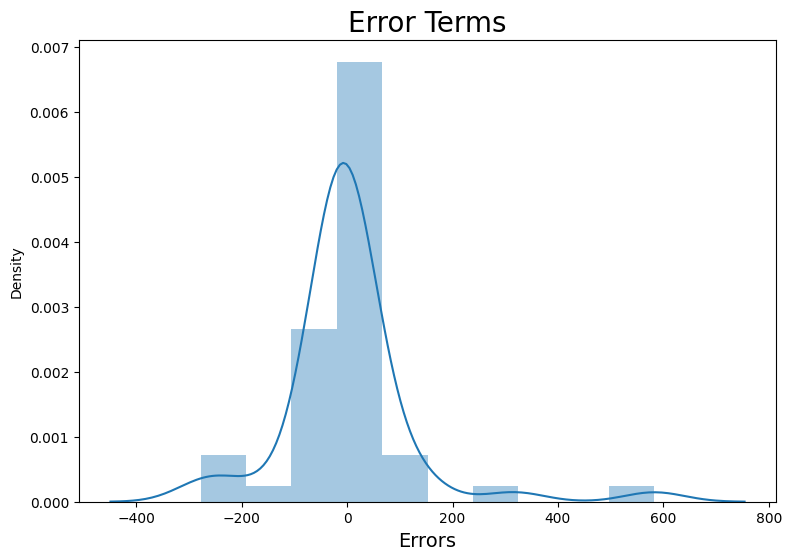

In [92]:

plt.figure(figsize=(9,6))

sns.distplot(resid4, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

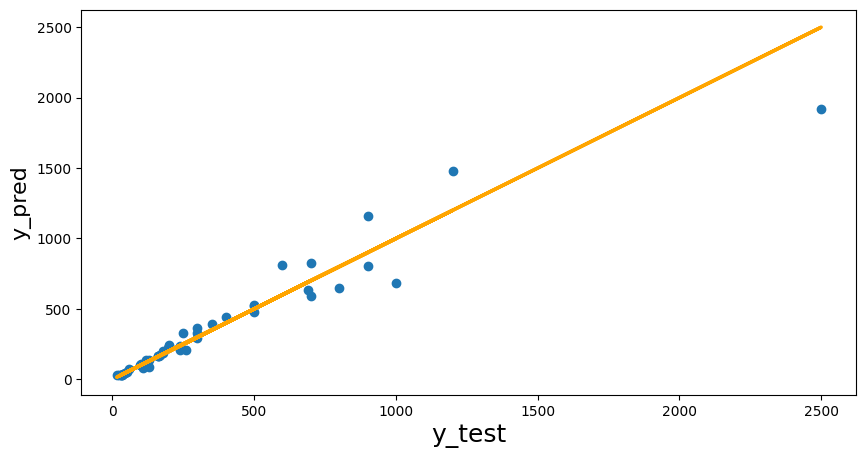

In [93]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred4)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [94]:
print("R2 Score:",r2_score(y_test, y_pred4))
print('MAE:', mean_absolute_error(y_test, y_pred4))
print('MSE:', mean_squared_error(y_test, y_pred4))

R2 Score: 0.9179904315712888
MAE: 60.81715224026849
MSE: 14983.441073346117


Gradient Boosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [174]:
parameters={"criterion":["friedman_mse", "squared_error"],
            "min_samples_split":[1,2,3,4,5],
            "learning_rate":[0.2,0.1,0.05,0.001],
            "n_estimators":[50,100,150,200]}

In [175]:
tuning_model = GradientBoostingRegressor()
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\YWG PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.2, 0.1, 0.05, 0.001],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [176]:
# best hyperparameters
print(grids.best_estimator_)
# best model score
print(grids.best_score_)

GradientBoostingRegressor(learning_rate=0.05, min_samples_split=5,
                          n_estimators=200)
0.8430518137986187


In [177]:
model5 = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.05, min_samples_split=5,
                          n_estimators=200)

model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

In [178]:
y_pred5

array([ 319.74445729, 2359.85666965,   39.47632508,  190.35843344,
        136.47004982,   15.00707243,  107.88743307,  252.82996823,
         66.39310394,  308.2557944 ,  106.91332939,  210.25751202,
        279.38577039,  689.60742125,  662.6698922 ,  232.36355404,
        468.24061306,   87.82302827,  167.87490136,  233.51324619,
        986.26956083,  102.81973441,  190.35843344,  690.60173678,
         78.40470667,  352.65709952,  161.19182315,   29.99356078,
         36.43491444,   42.72245085,  802.64689502,  200.71687029,
        206.1538043 ,  194.35008552, 1039.00491729,   32.68241558,
        254.78015875,  480.54809458,  472.40841803,  125.84507516,
        289.45640627,    3.52380022,  677.895544  ,  436.68351446,
        922.21315846, 1395.41528023,   48.90812718,  240.85557809])

In [179]:
X_test

,Units Sold,Unit Price,Month,Day,Product Category_Beauty Products,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,...,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Asia,Region_Europe,Region_North America,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal
24,1,299.99,1,25,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
6,1,2499.99,1,7,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
93,3,14.99,4,3,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
109,1,159.99,4,19,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
104,3,39.99,4,14,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
172,1,29.50,6,21,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
233,3,32.95,8,21,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
86,3,79.99,3,27,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,2,25.99,1,10,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
143,1,299.99,5,23,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [180]:
resid5 = y_test - y_pred5

C:\Users\YWG PC\AppData\Local\Temp\ipykernel_3632\1612556269.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid5, bins=10)


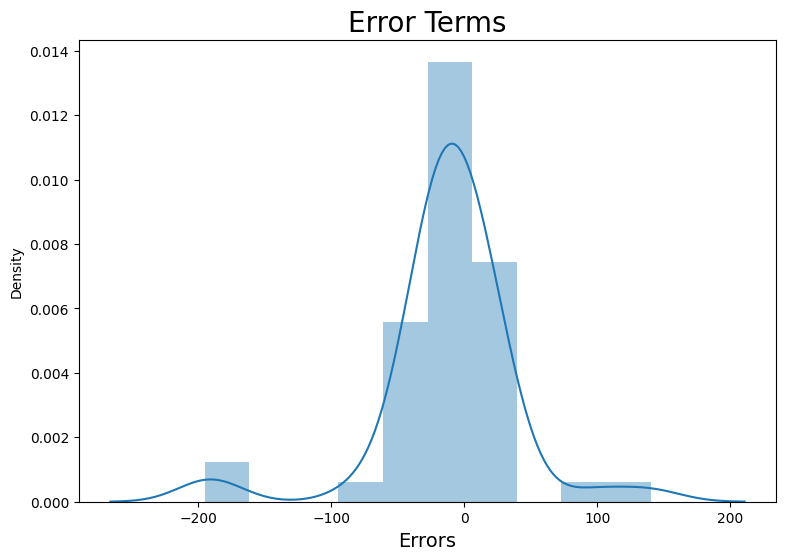

In [181]:
plt.figure(figsize=(9,6))

sns.distplot(resid5, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

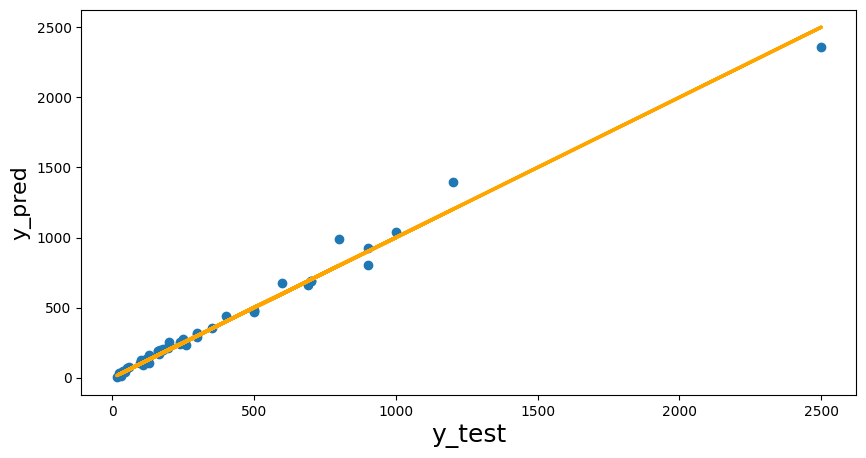

In [182]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred5)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [183]:
print("R2 Score:",r2_score(y_test, y_pred5))
print('MAE:', mean_absolute_error(y_test, y_pred5))
print('MSE:', mean_squared_error(y_test, y_pred5))

R2 Score: 0.9852666214476358
MAE: 31.255504735419937
MSE: 2691.8408861345088


Comparing Metrics

In [184]:
predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]

model_names = ['Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor', 
               'Gradient Boosting Regressor']

for i, y_pred in enumerate(predictions):
    print(f"Metrics for {model_names[i]}:")
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("MAE Score: ", mean_absolute_error(y_test, y_pred))
    print("MSE Score: ", mean_squared_error(y_test, y_pred))
    print('')

Metrics for Linear Regression:
R2 Score:  -24.833182673345522
MAE Score:  1204.351726743166
MSE Score:  4719814.745269977

Metrics for SVR:
R2 Score:  0.905256013165916
MAE Score:  59.555799072121225
MSE Score:  17310.06480074811

Metrics for Decision Tree Regressor:
R2 Score:  0.9246701739602483
MAE Score:  49.420624999999994
MSE Score:  13763.028280208331

Metrics for Random Forest Regressor:
R2 Score:  0.9179904315712888
MAE Score:  60.81715224026849
MSE Score:  14983.441073346117

Metrics for Gradient Boosting Regressor:
R2 Score:  0.9852666214476358
MAE Score:  31.255504735419937
MSE Score:  2691.8408861345088



R-squared (R²): The R² score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score of 0.9852 means that approximately 98.52% of the variance in the dependent variable is explained by the model.

Mean Absolute Error (MAE): This metric represents the average absolute difference between the predicted values and the actual values. An MAE of 31.25 means that, on average, the predictions of the model are off by about 31.25 units from the actual values.

Mean Squared Error (MSE): This metric represents the average squared difference between the predicted values and the actual values. An MSE of 2691.84 indicates that the average of the squares of the errors is 2691.84. Because this metric squares the errors before averaging them, it gives more weight to larger errors.

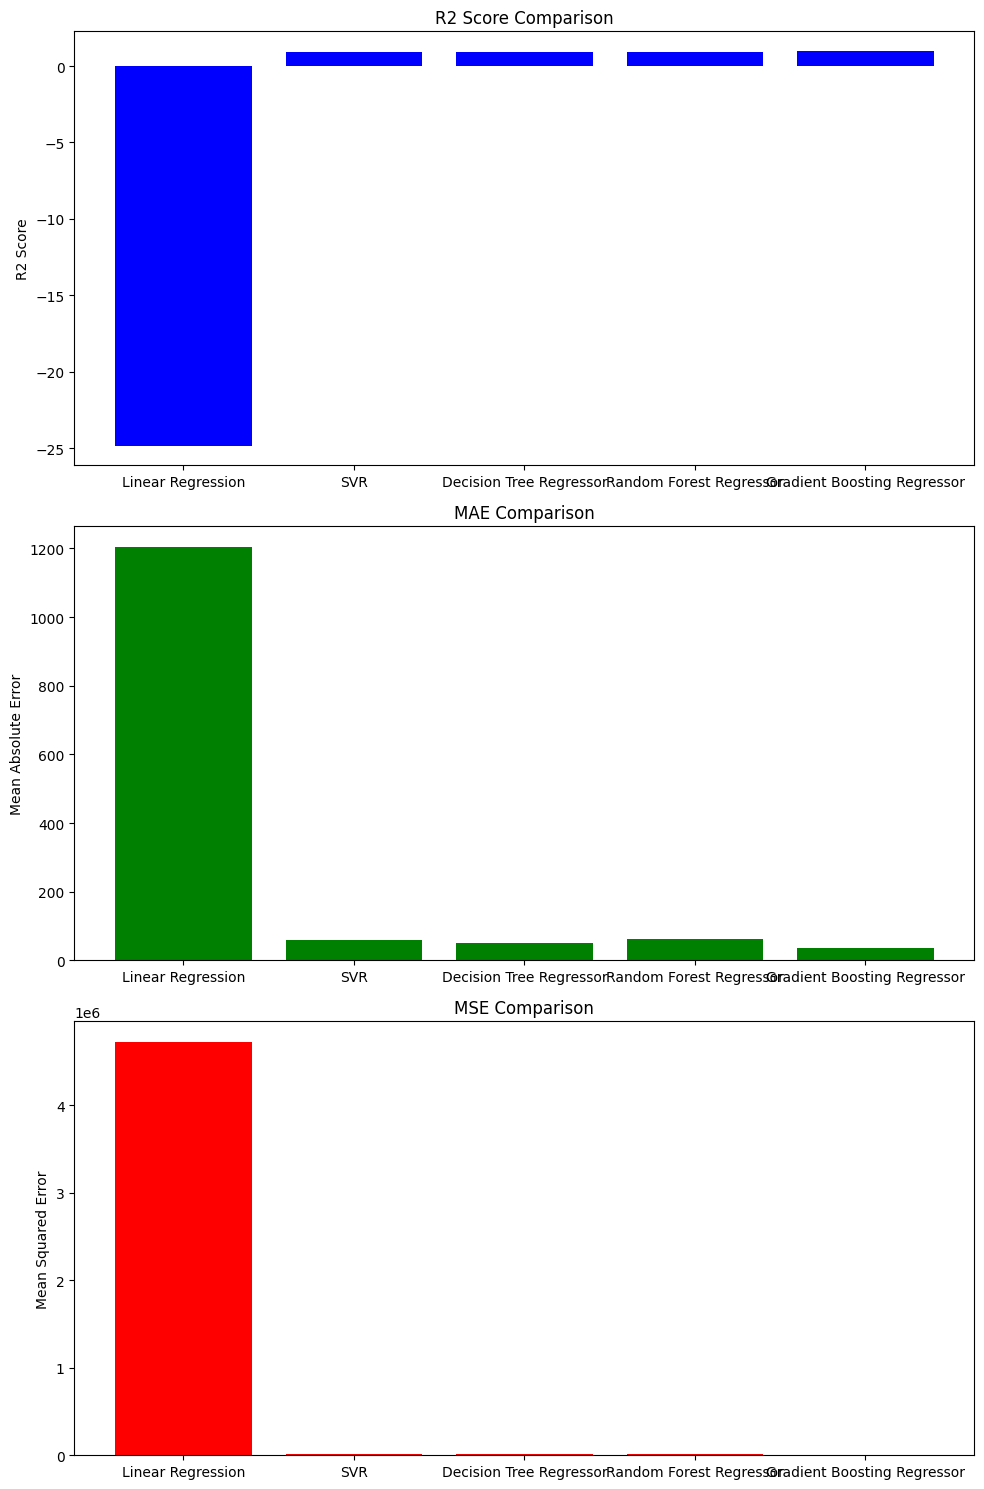

In [104]:
# Initialize lists to store the metrics
r2_scores = []
maes = []
mses = []

# Calculate metrics for each model
for y_pred in predictions:
    r2_scores.append(r2_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# Plotting the metrics
x = np.arange(len(model_names))  # the label locations

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# R2 Score plot
axs[0].bar(x, r2_scores, color='blue')
axs[0].set_title('R2 Score Comparison')
axs[0].set_ylabel('R2 Score')
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names)

# MAE plot
axs[1].bar(x, maes, color='green')
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('Mean Absolute Error')
axs[1].set_xticks(x)
axs[1].set_xticklabels(model_names)

# MSE plot
axs[2].bar(x, mses, color='red')
axs[2].set_title('MSE Comparison')
axs[2].set_ylabel('Mean Squared Error')
axs[2].set_xticks(x)
axs[2].set_xticklabels(model_names)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Neural Network

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2

In [163]:
model = keras.Sequential([
layers.Input(shape=(248,)),        # Input layer = number of features = train_columns
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(64, activation='relu',  kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu',  kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu',  kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1)   
])

In [164]:
model.compile(optimizer='adam', loss='mean_squared_error',  
              metrics=['mean_absolute_error'])

In [165]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 32)             │         7,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,041 (136.88 KB)

 Trainable params: 35,041 (136.88 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [167]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

Epoch 1/100


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 491603.3125 - mean_absolute_error: 359.7237 - val_loss: 262495.3438 - val_mean_absolute_error: 327.5313
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 279831.4375 - mean_absolute_error: 292.0351 - val_loss: 220355.7344 - val_mean_absolute_error: 301.9117
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 276571.7812 - mean_absolute_error: 298.8072 - val_loss: 171843.6094 - val_mean_absolute_error: 268.4977
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 194887.0156 - mean_absolute_error: 248.1029 - val_loss: 114382.6641 - val_mean_absolute_error: 220.1037
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 146183.2969 - mean_absolute_error: 197.1293 - val_loss: 55974.2539 - val_mean_absolute_error: 150.4172
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63118.6641 - mean_absolute_error: 146.8568 - val_loss: 23885.5410 - val_mean_absolute_error: 85.6063
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

In [168]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16768.1406 - mean_absolute_error: 77.1193 
Test Loss: [16140.4765625, 76.26522827148438]


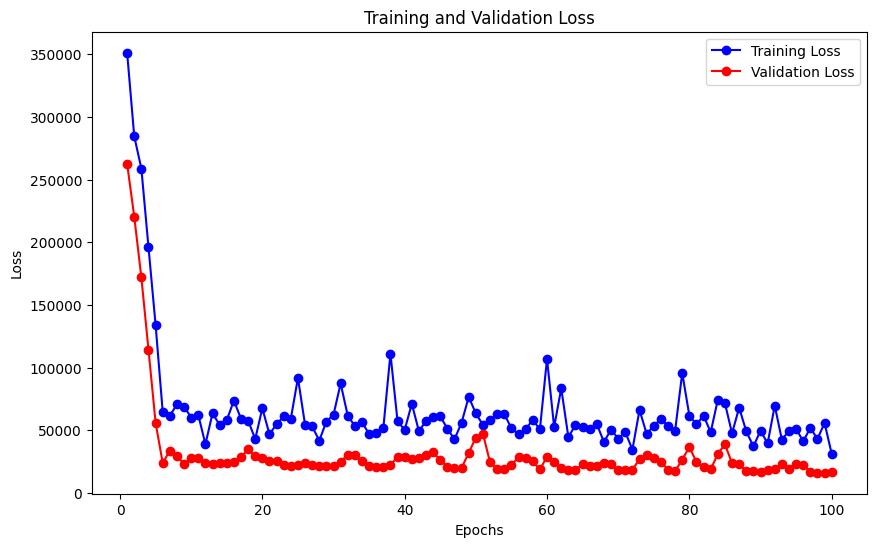

In [169]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

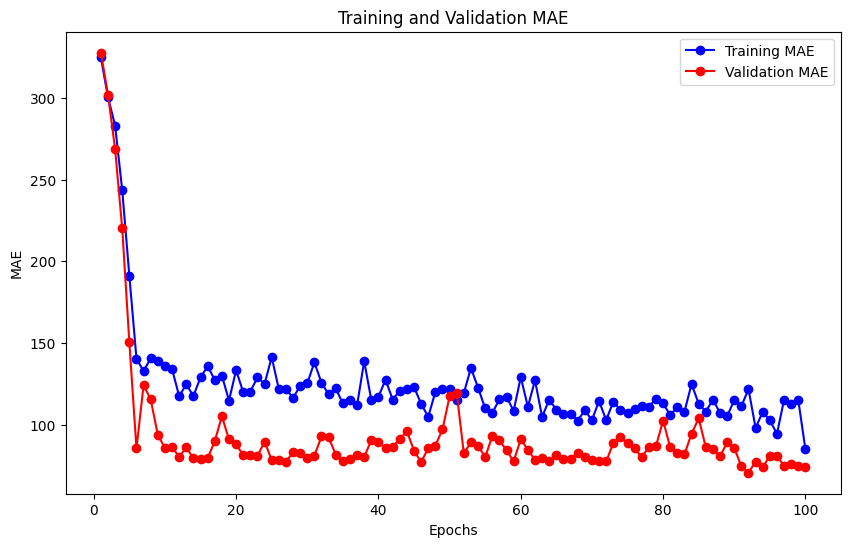

In [170]:
# Extract metric values from the training history
train_mae = history.history['mean_absolute_error'] 
val_mae = history.history['val_mean_absolute_error'] 
# Adjust based on the metrics you are using

# Plot training and validation metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [171]:
# Make predictions
y_pred6 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [172]:
# R-squared Score
r2 = r2_score(y_test, y_pred6)
print(f'R-squared Score: {r2}')

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred6)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred6)
print(f'Mean Squared Error: {mse}')

R-squared Score: 0.911658941080105
Mean Absolute Error: 76.26523488839466
Mean Squared Error: 16140.22700087564


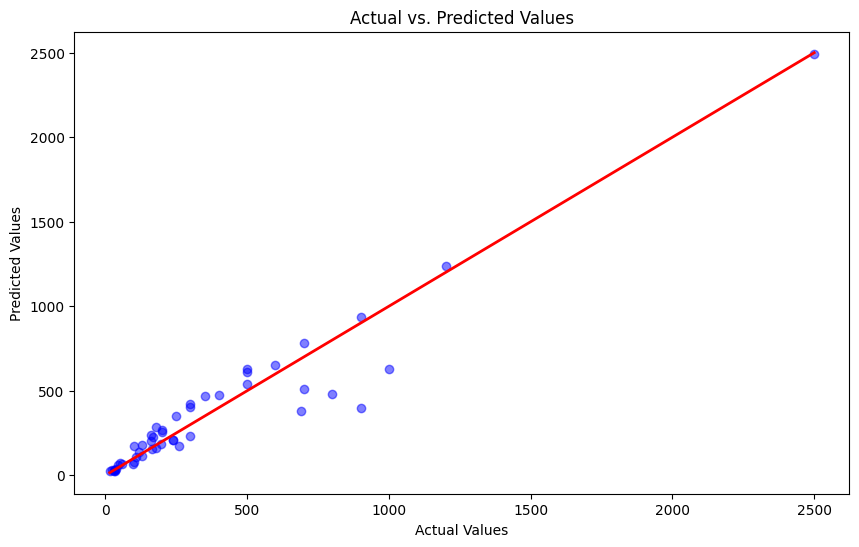

In [173]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred6, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

The Neural Network needs some more hyper parameter tuning, for now the Gradient Boosting Regressor produces the best results.